In [37]:
from glob import glob
from tqdm import tqdm
import numpy as np
from keras.utils import load_img, img_to_array
from keras.saving import load_model
import matplotlib.pyplot as plt

In [2]:
model = load_model("feature_extraction_with_data_augmentation.keras")

I0000 00:00:1766064718.838309    6752 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1768 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2050, pci bus id: 0000:01:00.0, compute capability: 8.6


In [3]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MobileNetV3Small (Functional)   │ (None, 5, 5, 576)      │       939,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 576)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,050,101 (4.01 MB)

 Trainable params: 36,993 (144.50 KB)

 Non-trainable params: 939,120 (3.58 MB)

 Optimizer params: 73,988 (289.02 KB)

In [19]:
image_paths = glob('images/*.*g')

100%|████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  8.13it/s]


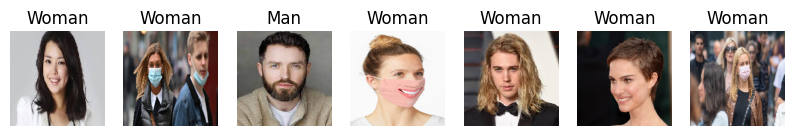

In [39]:
fig, axes = plt.subplots(1, 7, figsize=(10,3))
for i in tqdm(range(len(image_paths))):
    img = load_img(image_paths[i], target_size=(180, 180))
    img_arr = img_to_array(img).astype('uint8')
    img_arr = np.expand_dims(img_arr, axis=0)
    label = model.predict(img_arr, verbose=0)
    title = 'Woman' if label>0.5 else 'Man'
    axes[i].imshow(img)
    axes[i].set_axis_off()
    axes[i].set_title(title)